In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

C:\Users\Suril Waghmare\AppData\Local\Temp\ipykernel_13860\2975425257.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start=start, end = end)
[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [6]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-07-10,115987.203125,116608.781250,110660.750000,111329.195312,95911605728
2025-07-11,117516.992188,118856.476562,115245.687500,115986.234375,86928361085
2025-07-12,117435.226562,118219.898438,116977.023438,117530.710938,45524560304
2025-07-13,119116.117188,119449.570312,117265.437500,117432.203125,49021091807
2025-07-14,119849.703125,123091.609375,118959.195312,119115.789062,181746419401


In [7]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3954.0,2.341372e+04,2.743344e+04,1.781030e+02,2.276675e+03,1.007801e+04,3.756554e+04,1.198497e+05
High,BTC-USD,3954.0,2.388575e+04,2.792819e+04,2.117310e+02,2.369340e+03,1.027765e+04,3.862946e+04,1.230916e+05
Low,BTC-USD,3954.0,2.286440e+04,2.685101e+04,1.715100e+02,2.168203e+03,9.727717e+03,3.647713e+04,1.189592e+05
Open,BTC-USD,3954.0,2.338467e+04,2.739413e+04,1.768970e+02,2.258993e+03,1.007268e+04,3.751736e+04,1.191158e+05
Volume,BTC-USD,3954.0,1.989839e+10,2.124666e+10,5.914570e+06,9.426835e+08,1.604452e+10,3.128744e+10,3.509679e+11


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3954 entries, 2014-09-17 to 2025-07-14
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3954 non-null   float64
 1   (High, BTC-USD)    3954 non-null   float64
 2   (Low, BTC-USD)     3954 non-null   float64
 3   (Open, BTC-USD)    3954 non-null   float64
 4   (Volume, BTC-USD)  3954 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 185.3 KB


In [9]:
#close price data
closing_price = stock_data[['Close']]

KeyError: 'MA_365'

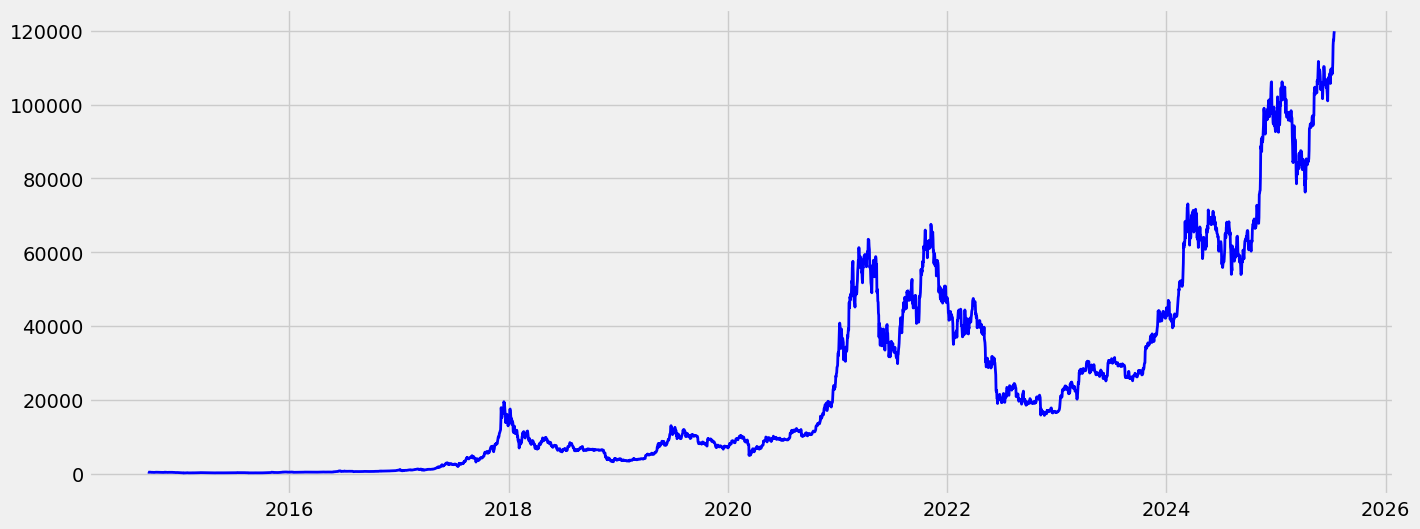

In [10]:
#Plot closing price with enhancement
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label= 'Close Price', color = 'blue', linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_365'], label= '365 Days Moving Average', color = 'red', linestyle = "--",  linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_100'], label= '100 Days Moving Average', color = 'green', linestyle = "--", linewidth = 2)

plt.title("Closing price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize=14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
#Moving Average
temp_data = [10,20,30,40,50,60,70,80,90, 100]
#moving average for 5 -> day null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)


40.0


In [12]:
df1 = pd.DataFrame(temp_data)

In [13]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range(2014,2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [15]:
closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()

C:\Users\Suril Waghmare\AppData\Local\Temp\ipykernel_13860\2942381381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
C:\Users\Suril Waghmare\AppData\Local\Temp\ipykernel_13860\2942381381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()


In [16]:
#LSTM -> Long Short Term Memory
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price['Close'].dropna())

In [17]:
scaled_data

array([[0.00233331],
       [0.00205844],
       [0.00181073],
       ...,
       [0.97982415],
       [0.99387001],
       [1.        ]])

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

c:\Users\Suril Waghmare\miniconda3\envs\tensorflow_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\Suril Waghmare\miniconda3\envs\tensorflow_env\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [20]:
#Prepare data for lstm
x_data = []
y_data = []
base_days=100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [21]:
#Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]


In [26]:
model = Sequential([LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)),
                    LSTM(64, return_sequences=False), 
                    Dense(25),
                    Dense(1)])

model.compile(optimizer= "adam", loss="mean_squared_error")
model.summary()

c:\Users\Suril Waghmare\miniconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.0018
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 2.2720e-04
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 1.5702e-04
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 1.7393e-04
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 1.8279e-04
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 1.0680e-04
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - loss: 8.4741e-05
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 9.9444e-05
Epoch 9/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 1.3407e-04
Epoch 10/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 8.1804e-05


In [28]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [29]:
predictions

array([[0.5189316 ],
       [0.49471423],
       [0.51027775],
       [0.5005249 ],
       [0.50788313],
       [0.4961312 ],
       [0.5018884 ],
       [0.5169032 ],
       [0.5168103 ],
       [0.5094118 ],
       [0.49415058],
       [0.46830976],
       [0.4680878 ],
       [0.48240048],
       [0.46001008],
       [0.46876022],
       [0.47937286],
       [0.475955  ],
       [0.47259215],
       [0.47763443],
       [0.48867112],
       [0.50100523],
       [0.5349749 ],
       [0.5335182 ],
       [0.52472806],
       [0.5246117 ],
       [0.5487315 ],
       [0.5503297 ],
       [0.55845046],
       [0.55270123],
       [0.5389415 ],
       [0.535878  ],
       [0.54008627],
       [0.55830985],
       [0.55539495],
       [0.5592508 ],
       [0.5464422 ],
       [0.54251575],
       [0.5295309 ],
       [0.5374243 ],
       [0.5026776 ],
       [0.49965453],
       [0.4783713 ],
       [0.44495434],
       [0.46514028],
       [0.45514193],
       [0.5125539 ],
       [0.500

In [31]:
inv_y_test

array([[ 60277.4140625 ],
       [ 61804.640625  ],
       [ 60811.27734375],
       [ 61604.80078125],
       [ 60320.13671875],
       [ 60887.37890625],
       [ 62678.29296875],
       [ 62851.98046875],
       [ 62029.015625  ],
       [ 60173.921875  ],
       [ 56977.703125  ],
       [ 56662.375     ],
       [ 58303.5390625 ],
       [ 55849.109375  ],
       [ 56705.09765625],
       [ 58009.2265625 ],
       [ 57742.49609375],
       [ 57344.9140625 ],
       [ 57899.46484375],
       [ 59231.953125  ],
       [ 60787.79296875],
       [ 64870.15234375],
       [ 65097.1484375 ],
       [ 64118.79296875],
       [ 63974.06640625],
       [ 66710.15625   ],
       [ 67163.6484375 ],
       [ 68154.5234375 ],
       [ 67585.25      ],
       [ 65927.671875  ],
       [ 65372.1328125 ],
       [ 65777.2265625 ],
       [ 67912.0625    ],
       [ 67813.3359375 ],
       [ 68255.8671875 ],
       [ 66819.9140625 ],
       [ 66201.015625  ],
       [ 64619.25      ],
       [ 653

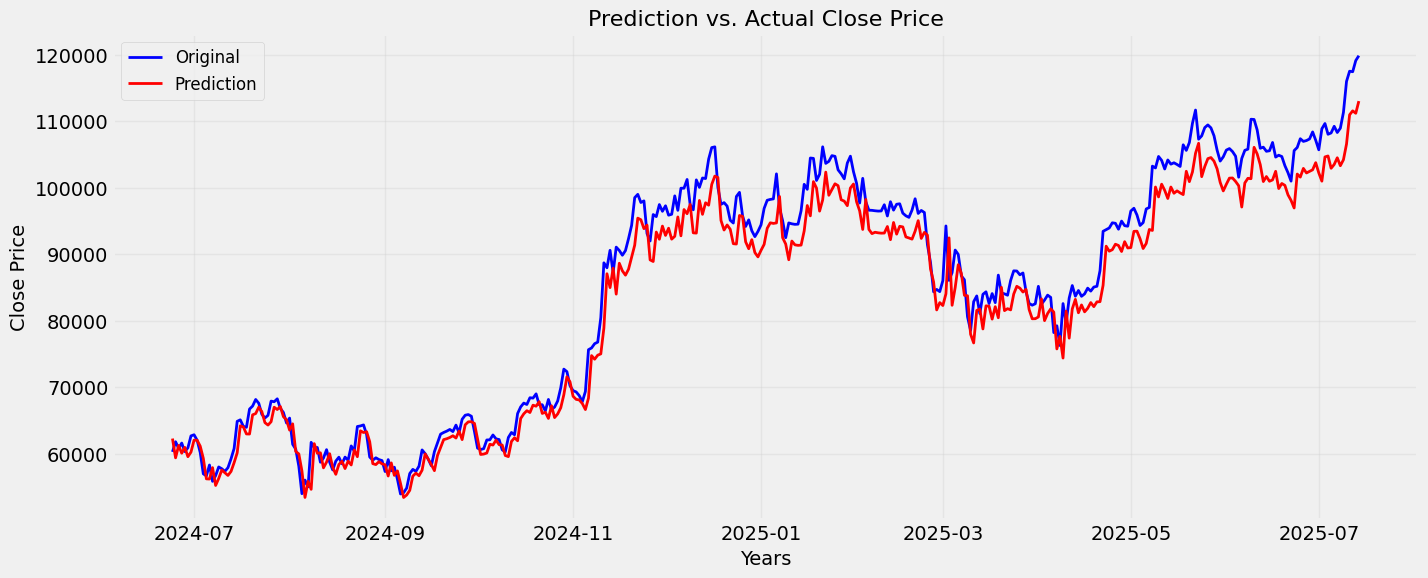

In [33]:
plotting_data = pd.DataFrame(
    {
        'Original' : inv_y_test.flatten(), 
        'Prediction' : inv_predictions.flatten()
    }, index = closing_price.index[train_size + base_days:]
)

#Plot closing price with enhancement
plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Original'], label= 'Original', color = 'blue', linewidth = 2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label= 'Prediction', color = 'red',  linewidth = 2)

plt.title("Prediction vs. Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize=14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

In [34]:
#Predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [36]:
future_predictions

[array([[113425.27]], dtype=float32),
 array([[106532.91]], dtype=float32),
 array([[100740.1]], dtype=float32),
 array([[96023.945]], dtype=float32),
 array([[92127.59]], dtype=float32),
 array([[88839.41]], dtype=float32),
 array([[86009.75]], dtype=float32),
 array([[83535.22]], dtype=float32),
 array([[81343.57]], dtype=float32),
 array([[79382.58]], dtype=float32)]

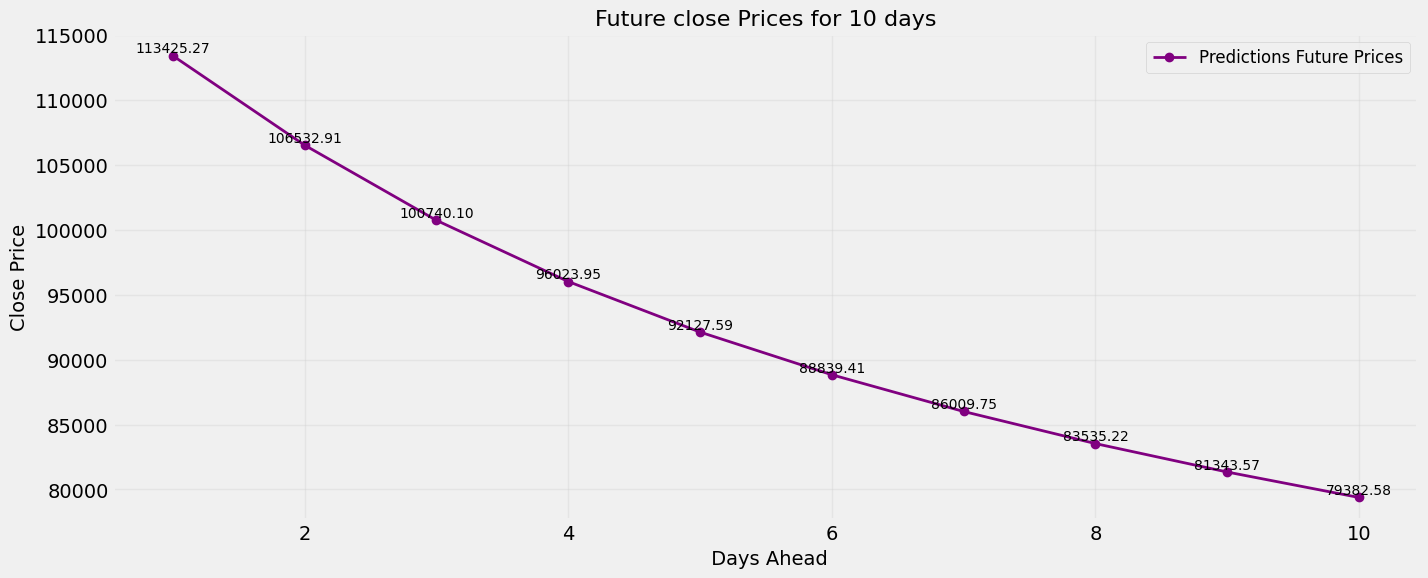

In [37]:
future_predictions = np.array(future_predictions).flatten()

#Plot closing price with enhancement
plt.figure(figsize=(15,6))
plt.plot(range(1,11), future_predictions, marker = "o", label= "Predictions Future Prices", color = 'purple', linewidth = 2)

for i, val in enumerate(future_predictions):
    plt.text(i+1, val, f'{val:.2f}', fontsize=10, ha = 'center', va = 'bottom', color='black', )
plt.title("Future close Prices for 10 days", fontsize = 16)
plt.xlabel(" Days Ahead", fontsize=14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

In [39]:
model.save("model.keras")